## En este notebook vamos a analizar los checkout y las caracteristicas de los celulares vendidos. Ademas vamos a analizar las busquedas y ver si hay una correlacion entre los eventos.

In [1]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [3]:
#categorizamos
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')

In [4]:
checkout = events[events['event'] == 'checkout']
checkout = checkout[['timestamp', 'person','model','condition','storage','color']]
checkout.head()

,timestamp,person,model,condition,storage,color
3,2018-05-31 23:38:40,0004b0a2,iPhone 5s,Bom,32GB,Cinza espacial
7,2018-05-29 13:29:35,0006a21a,Samsung Galaxy S8,Bom,64GB,Dourado
44,2018-05-24 11:34:32,000a54b2,Motorola Moto Z Play,Bom,32GB,Preto
85,2018-04-06 05:14:58,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto
86,2018-04-06 05:18:15,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto


In [5]:
checkout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33735 entries, 3 to 1011287
Data columns (total 6 columns):
timestamp    33735 non-null datetime64[ns]
person       33735 non-null object
model        33733 non-null object
condition    33733 non-null object
storage      33733 non-null object
color        33733 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 1.8+ MB


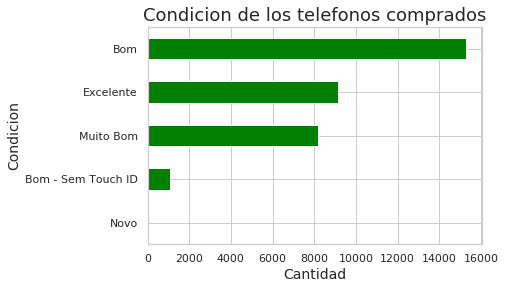

In [6]:
g = checkout['condition'].value_counts().sort_values().plot(kind = 'barh',color='green')
g.set_title('Condicion de los telefonos comprados',fontsize = 18)
g.set_ylabel('Condicion',fontsize = 14)
g.set_xlabel('Cantidad',fontsize = 14);

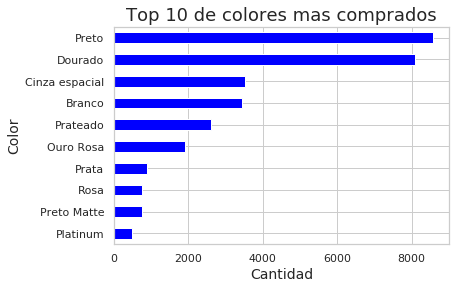

In [7]:
g = checkout['color'].value_counts().head(10).sort_values().plot(kind = 'barh',color ='blue')
g.set_title('Top 10 de colores mas comprados',fontsize = 18)
g.set_ylabel('Color',fontsize = 14)
g.set_xlabel('Cantidad',fontsize = 14);

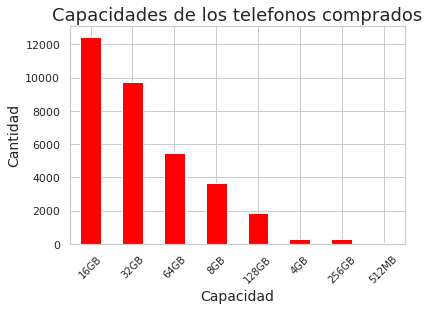

In [8]:
g = checkout['storage'].value_counts().plot(kind = 'bar', color='red')
g.set_title('Capacidades de los telefonos comprados',fontsize = 18)
g.set_xlabel('Capacidad',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

Se puede ver que los telefonos de 16GB/32GB/64GB/128GB son los mas comprados, mientras que los de menor capacidad no tiene una alta demanda, se recomienda tener mas stock de estos telefonos

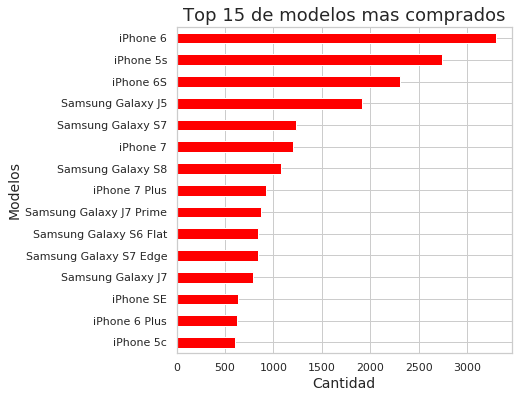

In [9]:
compras = checkout['model'].value_counts().head(15).sort_values()
g = plt.subplots(figsize = (6,6))
g = compras.plot(kind = 'barh', color = 'red')
g.set_title('Top 15 de modelos mas comprados',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14); #Estaria bueno superponer este grafico con el otro para compara el ranking de busqueda contra compra
                                      #y sacar conclusiones

#### Al igual que los modelos mas buscados, los iPhone son los telefonos mas demandados. En segundo lugar estan los Samsung galaxy S7, S8 y J5. 

#### Analizamos las caracteristicas de los modelos mas comprados

In [10]:
iPhone6_comprados = checkout[checkout['model'] == 'iPhone 6']
iPhone6_comprados = iPhone6_comprados[['storage','condition']]
iPhone6_comprados = pd.DataFrame(iPhone6_comprados.groupby('storage')['condition'].value_counts())
iPhone6_comprados = iPhone6_comprados.rename(columns = {'condition':'cantidad'})
iPhone6_comprados = iPhone6_comprados.reset_index()
iPhone6_comprados = iPhone6_comprados.rename(columns = {'storage':'capacidad'})
iPhone6_comprados = iPhone6_comprados.pivot('capacidad','condition','cantidad')
iPhone6_comprados

condition,Bom,Bom - Sem Touch ID,Excelente,Muito Bom
capacidad,,,,
128GB,110,5,60,60
16GB,903,284,438,298
64GB,524,10,326,277


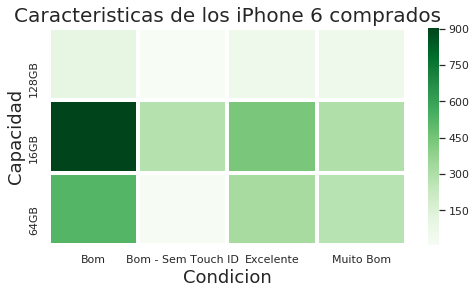

In [11]:
plt.figure(figsize = (8,4))
ax = sns.heatmap(iPhone6_comprados,linewidth = 3, cmap = 'Greens')
ax.set_title('Caracteristicas de los iPhone 6 comprados',Fontsize = 20)
ax.set_ylabel('Capacidad',Fontsize = 18)
ax.set_xlabel('Condicion',fontsize = 18);

In [12]:
#Se podria analizar las marcas y comparar tambien
#Conviene hacer un grafico de los modelos mas comprados teniendo en cuenta sus capacidades?

#### ¿Los clientes quedan conformes con el servicio brindado?

In [13]:
checkout['person'].value_counts().mean() #en promedio la persona que compro una ves no esta volviendo a comprar, se esta haciendo
                                         #poca publicidad sobre la gente que ya compro? Estan quedando satisfechos con el servicio?
                                         #Los productos son buenos entonces la gente no tiene que volver a comprar? Hay que tener en cuenta
                                         #que los datos son solo del 2018

1.22122067767159

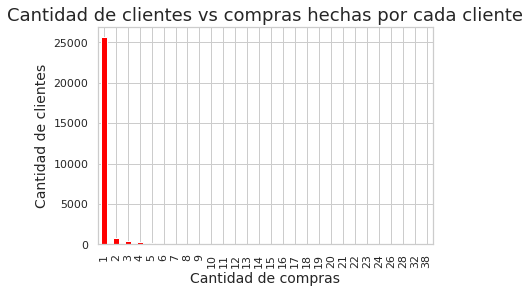

In [14]:
g = checkout['person'].value_counts().value_counts().sort_index().plot(kind = 'bar', color='red') # con normalize = True en value_counts se podria mostrar en % 
g.set_title('Cantidad de clientes vs compras hechas por cada cliente',fontsize = 18)
g.set_xlabel('Cantidad de compras',fontsize = 14)
g.set_ylabel('Cantidad de clientes',fontsize = 14);

#### Se puede ver en el grafico que la gran mayoria de los compadores no vuelven a comprar, se podria realizar algun tipo de encuesta para saber si quedan satisfechos con el serviocio brindado

#### ¿Cuando hay mayor actividad en las ventas a lo largo de la semana?

In [15]:
dias = checkout['timestamp'].dt.weekday_name.value_counts().sort_values()
dias = dias.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dias

Monday       4621
Tuesday      5928
Wednesday    5772
Thursday     5559
Friday       5244
Saturday     3474
Sunday       3137
Name: timestamp, dtype: int64

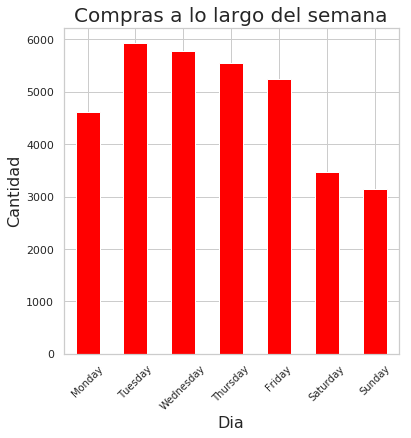

In [16]:
#este grafico deberia empezar de 1?
g = plt.subplots(figsize = (6,6))
g = dias.plot(kind = 'bar',color='red')
g.set_title('Compras a lo largo del semana',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

#### ¿Cuando hay mayor actividad en las ventas a lo largo del mes?

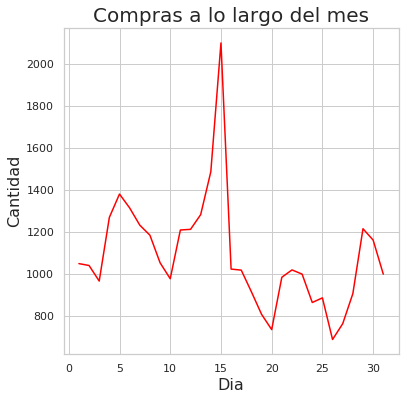

In [17]:
compras = checkout['timestamp'].dt.day.value_counts().sort_index()#este grafico deberia empezar de 1? mostrar 1,7,14,21,28?
g = plt.subplots(figsize = (6,6))
g = compras.plot(color='red')
g.set_title('Compras a lo largo del mes',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);

#### ¿Cuando hubo mayor actividad de ventas a lo largo del año?

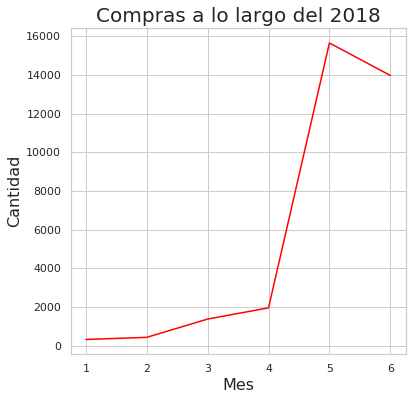

In [18]:
compras = checkout['timestamp'].dt.month.value_counts().sort_index() #este grafico deberia empezar de 1?
g = plt.subplots(figsize = (6,6))
g = compras.plot(color='red')
g.set_title('Compras a lo largo del 2018',fontsize = 20)
g.set_xlabel('Mes',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);

In [19]:
#Sacar concluciones

## Productos y marcas mas buscadas

In [20]:
searched_products = events[events['event'] == 'searched products']
searched_products = searched_products[['timestamp','person','search_term']]
searched_products.head()

,timestamp,person,search_term
157,2018-02-06 02:29:49,00204059,moto g 4
159,2018-02-06 02:32:41,00204059,moto g 4
238,2018-05-21 19:56:33,0024ad28,comprar celulares usados bom e barato em poa rs
239,2018-05-21 19:57:28,0024ad28,comprar celulares seminovos bom e barato em po...
240,2018-05-21 19:57:49,0024ad28,comprar celulares seminovos bom e barato em po...


In [21]:
searched_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56073 entries, 157 to 1011280
Data columns (total 3 columns):
timestamp      56073 non-null datetime64[ns]
person         56073 non-null object
search_term    48967 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [22]:
searched_products['search_term'].isnull().value_counts() #abria que decidir que hacemos con los nulls

False    48967
True      7106
Name: search_term, dtype: int64

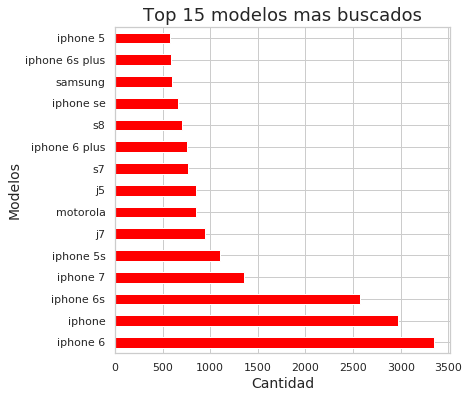

In [23]:
busquedas = searched_products['search_term'].dropna().map(lambda x: x.lower()).value_counts().head(15)
g = plt.subplots(figsize = (6,6))
g = busquedas.plot(kind = 'barh',color='red')
g.set_title('Top 15 modelos mas buscados',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14);

In [24]:
#el diccionario esta hecho a mano, vi las primeras posiciones y de ahi arme el diccionario, se podria pensar algo mejor. 
#no vi por ahora alguna funcion que haga la que defini, por ahi hay algo hecho pero no encontre
marcas = {'iPhone':['iphone','7s','6s','5se','5c','iphone se'], 'Samsung':['j1','j2','j3','j4','j5','j6','j7','galaxy','s7','s6','s5','s8','s9','samsung'], 'Motorola':['moto'],'LG':['lg']}
def asignar_marca(modelo):
    for marca in marcas:
        for m in marcas[marca]:
            if m in modelo:
                return marca
    return 'Otro'
marcas_buscadas = searched_products['search_term'].dropna().map(lambda x: asignar_marca(x.lower())).value_counts()
marcas_buscadas #creo que es bastante que queden 8000 en otro

iPhone      18982
Samsung     14659
Otro         8369
Motorola     5773
LG           1184
Name: search_term, dtype: int64

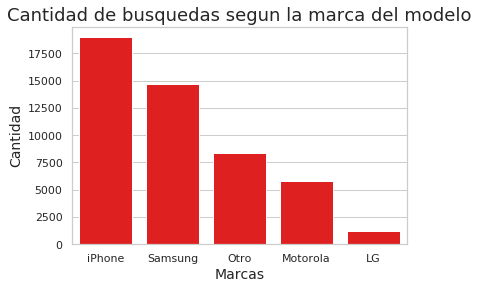

In [25]:
g = sns.barplot(x= marcas_buscadas.index, y=marcas_buscadas.values, orient= 'v',color='red')
g.set_title('Cantidad de busquedas segun la marca del modelo',fontsize = 18)
g.set_xlabel('Marcas',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14);

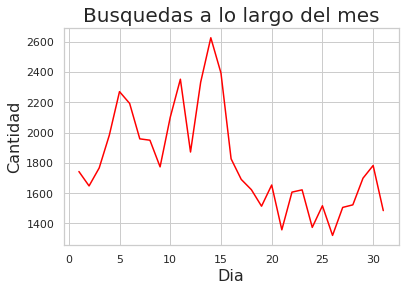

In [26]:
busquedas = searched_products['timestamp'].dt.day.value_counts().sort_index()#este grafico deberia empezar de 1? mostrar 1,7,14,21,28?
g = busquedas.plot(color='red')
g.set_title('Busquedas a lo largo del mes',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);

#### ¿Se relaciona la cantidad de busquedas con la cantidad de compras a lo largo del mes?

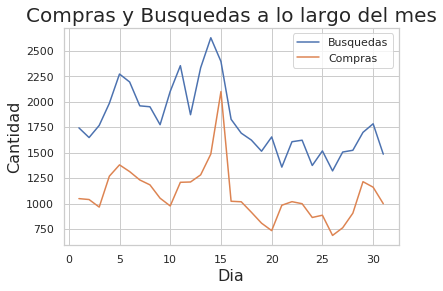

In [27]:
busquedas = searched_products['timestamp'].dt.day.value_counts().sort_index() 
compras = checkout['timestamp'].dt.day.value_counts().sort_index()
busquedas_vs_compras = busquedas.to_frame().rename({'timestamp':'Busquedas'},axis = 'columns')
busquedas_vs_compras['Compras'] = compras
g = busquedas_vs_compras.plot()
g.set_title('Compras y Busquedas a lo largo del mes',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);